   age  fnlwgt  education_num  capital_gain  capital_loss  hours_per_week  \
0   39   77516             13          2174             0              40   
1   50   83311             13             0             0              13   
2   38  215646              9             0             0              40   
3   53  234721              7             0             0              40   
4   28  338409             13             0             0              40   

   income_level  
0             0  
1             0  
2             0  
3             0  
4             0  
Accuracy with default n_estimators (10): 0.8182
Accuracy with 10 estimators: 0.8182
Accuracy with 50 estimators: 0.8327
Accuracy with 100 estimators: 0.8328
Accuracy with 150 estimators: 0.8329
Accuracy with 200 estimators: 0.8332
Accuracy with 300 estimators: 0.8336
Accuracy with 500 estimators: 0.8340


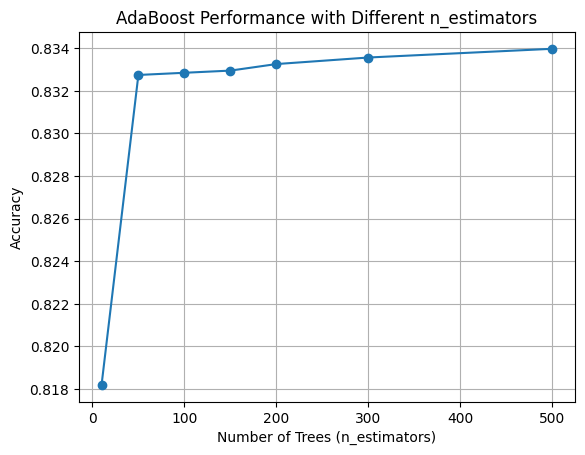

The best accuracy of 0.8340 was achieved with 500 estimators.


In [3]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/income (1).csv')

# Display the first few rows of the dataset to understand its structure
print(df.head())

# Assuming the target column is 'income' and the rest are features
X = df.drop('income_level', axis=1)  # Features: all columns except 'income'
y = df['income_level']  # Target: 'income' column

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Build an AdaBoost classifier with the default n_estimators (10)
adaboost_default = AdaBoostClassifier(n_estimators=10, random_state=42)
adaboost_default.fit(X_train, y_train)

# Make predictions on the test set
y_pred_default = adaboost_default.predict(X_test)

# Calculate accuracy score with default model
accuracy_default = accuracy_score(y_test, y_pred_default)
print(f"Accuracy with default n_estimators (10): {accuracy_default:.4f}")

# 2. Fine-tune the model by changing n_estimators and evaluating the performance
n_estimators_list = [10, 50, 100, 150, 200, 300, 500]
accuracies = []

for n in n_estimators_list:
    adaboost = AdaBoostClassifier(n_estimators=n, random_state=42)
    adaboost.fit(X_train, y_train)
    y_pred = adaboost.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"Accuracy with {n} estimators: {accuracy:.4f}")

# Plot the results
plt.plot(n_estimators_list, accuracies, marker='o')
plt.title('AdaBoost Performance with Different n_estimators')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Find the best score and corresponding n_estimators
best_accuracy = max(accuracies)
best_n_estimators = n_estimators_list[accuracies.index(best_accuracy)]
print(f"The best accuracy of {best_accuracy:.4f} was achieved with {best_n_estimators} estimators.")


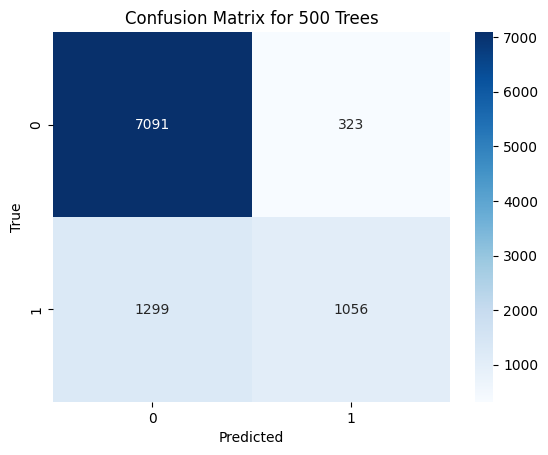

In [4]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Using the best model with the optimal n_estimators
best_adaboost = AdaBoostClassifier(n_estimators=best_n_estimators, random_state=42)
best_adaboost.fit(X_train, y_train)

# Predictions using the best model
y_pred_best = best_adaboost.predict(X_test)

# Generate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=best_adaboost.classes_, yticklabels=best_adaboost.classes_)
plt.title(f"Confusion Matrix for {best_n_estimators} Trees")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


   age  fnlwgt  education_num  capital_gain  capital_loss  hours_per_week  \
0   39   77516             13          2174             0              40   
1   50   83311             13             0             0              13   
2   38  215646              9             0             0              40   
3   53  234721              7             0             0              40   
4   28  338409             13             0             0              40   

   income_level  
0             0  
1             0  
2             0  
3             0  
4             0  
Accuracy with 10 estimators: 0.8182
Accuracy with 50 estimators: 0.8327
Accuracy with 100 estimators: 0.8328
Accuracy with 150 estimators: 0.8329
Accuracy with 200 estimators: 0.8332
Accuracy with 300 estimators: 0.8336
Accuracy with 500 estimators: 0.8340
The best accuracy of 0.8340 was achieved with 500 estimators.
Confusion Matrix for 500 estimators:
[[7091  323]
 [1299 1056]]


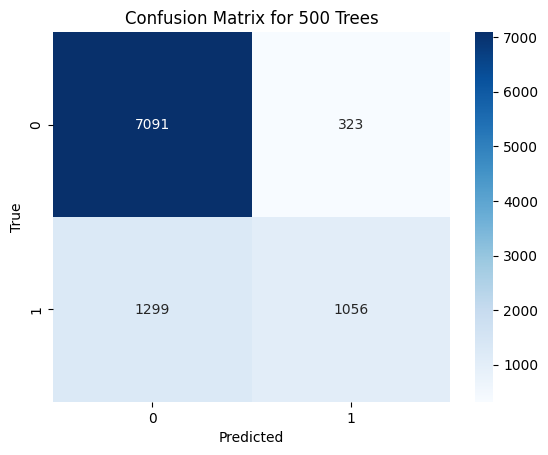

In [7]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/income (1).csv')

# Display the first few rows of the dataset to understand its structure
print(df.head())

# Assuming the target column is 'income' and the rest are features
X = df.drop('income_level', axis=1)  # Features: all columns except 'income'
y = df['income_level']  # Target: 'income' column

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fine-tune the model by changing n_estimators and evaluating the performance
n_estimators_list = [10, 50, 100, 150, 200, 300, 500]
accuracies = []

for n in n_estimators_list:
    adaboost = AdaBoostClassifier(n_estimators=n, random_state=42)
    adaboost.fit(X_train, y_train)
    y_pred = adaboost.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"Accuracy with {n} estimators: {accuracy:.4f}")

# Find the best score and corresponding n_estimators
best_accuracy = max(accuracies)
best_n_estimators = n_estimators_list[accuracies.index(best_accuracy)]
print(f"The best accuracy of {best_accuracy:.4f} was achieved with {best_n_estimators} estimators.")

# Using the best model with the optimal n_estimators
best_adaboost = AdaBoostClassifier(n_estimators=best_n_estimators, random_state=42)
best_adaboost.fit(X_train, y_train)

# Predictions using the best model
y_pred_best = best_adaboost.predict(X_test)

# Generate and print the confusion matrix
cm = confusion_matrix(y_test, y_pred_best)
print(f"Confusion Matrix for {best_n_estimators} estimators:")
print(cm)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=best_adaboost.classes_, yticklabels=best_adaboost.classes_)
plt.title(f"Confusion Matrix for {best_n_estimators} Trees")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
